# Naive Bayes 실습

## 직접 구현
- 긍정(1), 부정(0)
- 새로운 메일의 'happy weekend'는 긍정 부정?

In [57]:
import pandas as pd
import numpy as np
input_file=pd.read_csv('C:/Users/user/AI-NLP/NLP/naivebayes_example.csv')
input_file

,mail,label
0,i love you,1
1,love happy weekend,1
2,bore work job,0
3,i hate you,0
4,bore weekend,0
5,happy together,1


In [58]:
training_set = np.array(input_file)
print(training_set) 

[['i love you' 1]
 ['love happy weekend' 1]
 ['bore work job' 0]
 ['i hate you' 0]
 ['bore weekend' 0]
 ['happy together' 1]]


## 토큰 빈도수 및 문서별 토큰수 계산
- 확률계산을 위한 준비

In [60]:
# 토큰별로 문서 내 빈도수 카운팅
from collections import defaultdict
wordfreq = defaultdict(lambda : [0,0])  # lambda : 새로운 단어가 추가 될때 default 를 [0,0]으로 하겠다. [긍정,부정]
for doc, point in training_set:
    words = doc.split()
    for word in words:
        if point == 1:   
            wordfreq[word][0] +=1 # 긍정인 경우 0번째 인텍스에 1더해라 
        else:
            wordfreq[word][1] +=1 # 부정인 경우 1번째 인텍스에 1더해라
        
wordfreq

defaultdict(<function __main__.<lambda>()>,
            {'i': [1, 1],
             'love': [2, 0],
             'you': [1, 1],
             'happy': [2, 0],
             'weekend': [1, 1],
             'bore': [0, 2],
             'work': [0, 1],
             'job': [0, 1],
             'hate': [0, 1],
             'together': [1, 0]})

In [62]:
#긍정/ 부정 빈도수 계산
긍정전체토큰수=[]
부정전체토큰수=[]

for key, (cnt1,cnt0) in wordfreq.items():
    긍정전체토큰수.append(int(cnt1))
    부정전체토큰수.append(int(cnt0))
    
전체갯수_긍정=sum(긍정전체토큰수)
전체갯수_부정=sum(부정전체토큰수)
print(전체갯수_긍정,전체갯수_부정)

8 8


In [63]:
긍정전체토큰수

[1, 2, 1, 2, 1, 0, 0, 0, 0, 1]

## Training:토큰별 조건부 확률 계산

In [65]:
wordprobs = defaultdict(lambda:[0,0])
for key, (cnt1,cnt0) in wordfreq.items():
    #라플라스스무딩을 써서 +1을 해줌
    wordprobs[key][0] = (cnt1 + 1)/(전체갯수_긍정 + len(wordfreq))
    wordprobs[key][1] = (cnt0 + 1)/(전체갯수_부정 + len(wordfreq))
wordprobs

defaultdict(<function __main__.<lambda>()>,
            {'i': [0.1111111111111111, 0.1111111111111111],
             'love': [0.16666666666666666, 0.05555555555555555],
             'you': [0.1111111111111111, 0.1111111111111111],
             'happy': [0.16666666666666666, 0.05555555555555555],
             'weekend': [0.1111111111111111, 0.1111111111111111],
             'bore': [0.05555555555555555, 0.16666666666666666],
             'work': [0.05555555555555555, 0.1111111111111111],
             'job': [0.05555555555555555, 0.1111111111111111],
             'hate': [0.05555555555555555, 0.1111111111111111],
             'together': [0.1111111111111111, 0.05555555555555555]})

## classify: 새로운 단어가 추가됐을때 확률

In [66]:
import math
doc='happy weekend'
tokens=doc.split()

#초기값을 모두 0으로 처리
log_prob1=log_prob0=0.0

#모든 단어에 대해 반복
for word,(prob1,prob0) in wordprobs.items():
    if word in tokens:
        log_prob1+=math.log(prob1)
        log_prob0+=math.log(prob0)
log_prob1+=math.log(전체갯수_긍정/(전체갯수_긍정+전체갯수_부정))
log_prob0+=math.log(전체갯수_부정/(전체갯수_긍정+전체갯수_부정))

prob1=math.exp(log_prob1)
print('prob1',prob1)
prob0=math.exp(log_prob0)
print('prob0',prob0)

print('happy와 weekend가 새로운 메일에 포함되어 있을 경우, 긍정확률과 부정확률')
print('긍정확률: {}%'.format(prob1/(prob0+prob1)*100))
print('부정확률: {}%'.format(prob0/(prob0+prob1)*100))

prob1 0.009259259259259257
prob0 0.0030864197530864183
happy와 weekend가 새로운 메일에 포함되어 있을 경우, 긍정확률과 부정확률
긍정확률: 75.00000000000001%
부정확률: 24.999999999999996%


## sklearn 모듈 이용

In [4]:
import pandas as pd
input_file=pd.read_csv('C:/Users/user/AI-NLP/NLP/naivebayes_example.csv')
input_file

,mail,label
0,i love you,1
1,love happy weekend,1
2,bore work job,0
3,i hate you,0
4,bore weekend,0
5,happy together,1


In [5]:
X_train=list(input_file['mail'])
Y_train=list(input_file['label'])
print(X_train)
print(Y_train)

['i love you', 'love happy weekend', 'bore work job', 'i hate you', 'bore weekend', 'happy together']
[1, 1, 0, 0, 0, 1]


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#countvectorizer 선언
count_vect=CountVectorizer()
#fit and transform
X_train_counts=count_vect.fit_transform(X_train)
#multinomialNB 선언 and fit
clf=MultinomialNB().fit(X_train_counts,Y_train)

In [9]:
#예측
print(clf.predict(count_vect.transform(['happy weekend'])))
#확률
print(clf.predict_proba(count_vect.transform(['happy weekend'])))

[1]
[[0.25 0.75]]


# 네이버 영화감상리뷰 데이터
- https://github.com/e9t/nsmc

- 전처리: 데이터프레임 결측값 제거

In [1]:
import pandas as pd
test_file=pd.read_csv('ratings_test.txt',sep='\t',encoding='UTF-8')
test_file.isnull().sum()

id          0
document    3
label       0
dtype: int64

In [2]:
test_file.loc[test_file.isnull()['document'],:]

,id,document,label
5746,402110,NaN,1
7899,5026896,NaN,0
27097,511097,NaN,1


In [3]:
test_file1=test_file.dropna()
test_file1.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [4]:
train_file=pd.read_csv('ratings_train.txt',sep='\t',encoding='UTF-8')
train_file.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [5]:
train_file.loc[train_file.isnull()['document'],:]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [6]:
train_file1=train_file.dropna()
del train_file1['id']
train_file1.isnull().sum()

document    0
label       0
dtype: int64

In [7]:
import MeCab
m=MeCab.Tagger()
out=m.parse('Mecab이 잘 설치 되었는지')
print(out)

Mecab	SL,*,*,*,*,*,*,*
이	JKS,*,F,이,*,*,*,*
잘	MAG,*,T,잘,*,*,*,*
설치	NNG,행위,F,설치,*,*,*,*
되	XSV,*,F,되,*,*,*,*
었	EP,*,T,었,*,*,*,*
는지	EC,*,F,는지,*,*,*,*
EOS



In [8]:
#mecab 딕셔너리 파일 위치 수정해야함
from konlpy.tag import Mecab
mecab=Mecab()
stop_word=['으로','이다','에서','이랑','까지','부터']

def token_mecab(text):
    text=mecab.morphs(text)
    text=[i for i in text if len(i)>1]
    text=[i for i in text if i not in stop_word]
    return text

- 토큰 빈도수 및 문서별 토큰수 계산

In [83]:
sentlist=list(train_file1['document'])

In [86]:
sentlist

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

In [97]:
from konlpy.tag import Okt
okt=Okt()
wordl=[]

for i in sentlist:
    nouns=okt.nouns(i)
    for n in nouns:
        if len(n)>1:
            wordl.append(n)

In [100]:
print(wordl[:10])

['더빙', '진짜', '목소리', '포스터', '보고', '초딩', '영화', '오버', '연기', '무재']


In [101]:
from collections import Counter
count=Counter(wordl)
#print(count)

wdic=dict(count.most_common())
wdic

{'영화': 50737,
 '정말': 9645,
 '진짜': 8343,
 '연기': 6434,
 '평점': 6324,
 '최고': 6035,
 '스토리': 5344,
 '생각': 5314,
 '드라마': 5063,
 '감동': 4879,
 '사람': 4836,
 '보고': 4612,
 '배우': 4297,
 '감독': 4126,
 '재미': 3930,
 '내용': 3899,
 '그냥': 3838,
 '쓰레기': 3542,
 '시간': 3446,
 '작품': 2964,
 '사랑': 2943,
 '다시': 2838,
 '하나': 2838,
 '마지막': 2755,
 '이건': 2688,
 '완전': 2542,
 '정도': 2523,
 '처음': 2452,
 '장면': 2436,
 '액션': 2397,
 '주인공': 2382,
 '최악': 2268,
 '지금': 2206,
 '이야기': 2174,
 '별로': 2143,
 '느낌': 2095,
 '연출': 2082,
 '명작': 2041,
 '역시': 1994,
 '이해': 1906,
 '이영화': 1824,
 '여자': 1742,
 '때문': 1735,
 '보기': 1611,
 '기억': 1596,
 '결말': 1579,
 '마음': 1553,
 '인생': 1541,
 '소재': 1511,
 '수준': 1448,
 '현실': 1418,
 '한번': 1402,
 '가장': 1396,
 '반전': 1382,
 '매력': 1372,
 '전개': 1368,
 '남자': 1338,
 '한국': 1337,
 '가슴': 1331,
 '음악': 1288,
 '아이': 1279,
 '원작': 1252,
 '인간': 1212,
 '무슨': 1203,
 '우리': 1199,
 '추천': 1193,
 '눈물': 1181,
 '자체': 1150,
 '캐릭터': 1075,
 '코미디': 1072,
 '대박': 1065,
 '뭔가': 1056,
 '대한': 1052,
 '전혀': 1044,
 '이상': 1039,
 '연기력': 1035,
 

In [102]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

%matplotlib inline

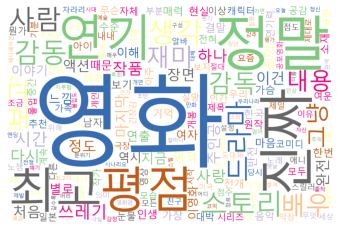

In [103]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(wdic) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [109]:
training_set = np.array(train_file1)
print(training_set) 

[['아 더빙.. 진짜 짜증나네요 목소리' 0]
 ['흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나' 1]
 ['너무재밓었다그래서보는것을추천한다' 0]
 ...
 ['이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?' 0]
 ['청춘 영화의 최고봉.방황과 우울했던 날들의 자화상' 1]
 ['한국 영화 최초로 수간하는 내용이 담긴 영화' 0]]


In [106]:
# 토큰별로 문서 내 빈도수 카운팅
from collections import defaultdict
wordfreq = defaultdict(lambda : [0,0])  # lambda : 새로운 단어가 추가 될때 default 를 [0,0]으로 하겠다. [긍정,부정]
for doc, point in training_set:
    words = doc.split()
    for word in words:
        if point == 1:   
            wordfreq[word][0] +=1 # 긍정인 경우 0번째 인텍스에 1더해라 
        else:
            wordfreq[word][1] +=1 # 부정인 경우 1번째 인텍스에 1더해라
        
wordfreq

defaultdict(<function __main__.<lambda>()>,
            {'아': [500, 704],
             '더빙..': [0, 2],
             '진짜': [2885, 3044],
             '짜증나네요': [0, 10],
             '목소리': [39, 60],
             '흠...포스터보고': [1, 0],
             '초딩영화줄....오버연기조차': [1, 0],
             '가볍지': [17, 0],
             '않구나': [1, 1],
             '너무재밓었다그래서보는것을추천한다': [0, 1],
             '교도소': [2, 2],
             '이야기구먼': [0, 1],
             '..솔직히': [0, 1],
             '재미는': [84, 205],
             '없다..평점': [0, 1],
             '조정': [2, 8],
             '사이몬페그의': [1, 0],
             '익살스런': [2, 0],
             '연기가': [484, 250],
             '돋보였던': [20, 2],
             '영화!스파이더맨에서': [1, 0],
             '늙어보이기만': [1, 0],
             '했던': [70, 65],
             '커스틴': [3, 0],
             '던스트가': [1, 0],
             '너무나도': [122, 70],
             '이뻐보였다': [1, 0],
             '막': [64, 122],
             '걸음마': [0, 1],
             '뗀': [1, 1],
             '3세부터': [0, 1],
     

In [107]:
# 긍정/ 부정 빈도수 계산
긍정전체토큰수=[]
부정전체토큰수=[]
for key, (cnt1,cnt0) in wordfreq.items():
    긍정전체토큰수.append(int(cnt1))
    부정전체토큰수.append(int(cnt0))

전체갯수_긍정 = sum(긍정전체토큰수)
전체갯수_부정 = sum(부정전체토큰수)
print(전체갯수_긍정,전체갯수_부정)

561769 575967


In [108]:
긍정전체토큰수

[500,
 0,
 2885,
 0,
 39,
 1,
 1,
 17,
 1,
 0,
 2,
 0,
 0,
 84,
 0,
 2,
 1,
 2,
 484,
 20,
 1,
 1,
 70,
 3,
 1,
 122,
 1,
 64,
 0,
 1,
 0,
 35,
 0,
 0,
 0,
 34,
 43,
 260,
 0,
 175,
 0,
 10,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 90,
 5,
 247,
 1274,
 17,
 5580,
 44,
 913,
 1,
 290,
 3,
 5,
 1,
 4352,
 3,
 9,
 1,
 129,
 2,
 1,
 1,
 1,
 1,
 51,
 0,
 0,
 0,
 0,
 9,
 833,
 0,
 11,
 5,
 268,
 1,
 184,
 607,
 97,
 1,
 6,
 1,
 6,
 6,
 0,
 34,
 211,
 1444,
 218,
 809,
 2,
 0,
 255,
 0,
 111,
 2,
 1,
 32,
 7,
 1,
 867,
 92,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 12,
 7,
 0,
 0,
 3,
 1101,
 24,
 113,
 0,
 426,
 5291,
 7,
 6,
 1,
 5,
 2,
 1935,
 2,
 1,
 1,
 189,
 1,
 1,
 1,
 1,
 161,
 1,
 341,
 19,
 4,
 85,
 853,
 2,
 1,
 3,
 1013,
 43,
 314,
 3,
 301,
 129,
 1,
 8,
 0,
 403,
 5,
 26,
 0,
 0,
 657,
 0,
 0,
 13,
 253,
 1,
 88,
 17,
 1,
 0,
 112,
 0,
 2,
 0,
 0,
 15,
 8,
 63,
 67,
 1157,
 254,
 1,
 1,
 12,
 81,
 14,
 5,
 1062,
 0,
 169,
 1,
 2051,
 0,
 0,
 972,
 0,
 1,
 1,
 1,
 6,
 1,
 8,
 1,
 7,


In [49]:
X_trainset=list(train_file1['document'])
Y_trainset=list(train_file1['label'])

In [50]:
X_trainset[0]

'아 더빙.. 진짜 짜증나네요 목소리'

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#countvectorizer 선언
count_vect=CountVectorizer()
#fit and transform
X_train_c=count_vect.fit_transform(X_trainset)
#multinomialNB 선언 and fit
clf=MultinomialNB().fit(X_train_c,Y_trainset)

In [72]:
#예측
print(clf.predict(count_vect.transform(['더빙','배우'])))
#확률
print(clf.predict_proba(count_vect.transform(['더빙','배우'])))

[0 1]
[[0.81674911 0.18325089]
 [0.45449169 0.54550831]]
